# Part One: Network Models

## Watts-Strogatz Networks

* Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1.

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random as rnd
import collections

In [42]:
#set up vars
N = 500
k = 4 #average degree
p = [0, 0.1, 1]

#generating graphs
generated_graphs = []
for prob in p:
    generated_graphs.append(nx.watts_strogatz_graph(N,k,prob))

#calculate <d> for each graph
for i,item in enumerate(generated_graphs):
    print "p = "+ str(p[i]) + ", " + str(nx.average_shortest_path_length(item))

p = 0, 62.875751503
p = 0.1, 6.98121042084
p = 1, 4.72342284569


Describe what happens to the network when p = 1.
* When p = 1 the graph becomes very dense.

Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. 

In [101]:
N = 500
k = 4
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

#generating graphs
generated_graphs = {}
for prob in p:
    generated_subgraphs = [] #to store 50 generated graphs with p = prob
    for j in range(0,50):
        generated_subgraphs.append(nx.watts_strogatz_graph(N,k,prob))
    generated_graphs[prob] = generated_subgraphs
    
#calculate <d> for each graph
calculated_d = {}
for prob in p:
    graphs = generated_graphs[prob] #get graphs of particular prob (p)
    calculated_d_ofgraphs = [] #to store calculated <d>
    for i, item in enumerate(graphs):
        calculated_d_ofgraphs.append(nx.average_shortest_path_length(item))
    calculated_d[prob] = calculated_d_ofgraphs

In [126]:
#calculating standard deviation and mean
res_x = []
res_y = []
res_dev = []
for prob in p:
    res_y.append(np.mean(calculated_d[prob]))
    res_x.append(prob)
    res_dev.append(np.std(calculated_d[prob]))

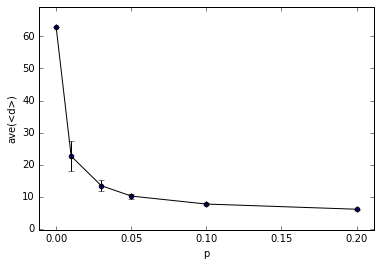

In [133]:
x = res_x #probability
y = res_y #mean
yerr = res_dev #deviation

plt.figure()
lines = plt.errorbar(x, y, xerr=0, yerr = yerr)
plt.ylabel('ave(<d>)')
plt.xlabel('p')
plt.margins(0.05, 0.1) #inner margin 
plt.setp(lines, 'color', 'black', 'linewidth', 1.0)
plt.scatter(x,y,s=20) #size of dots
plt.show()

# The Barabasi-Albert Model
* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

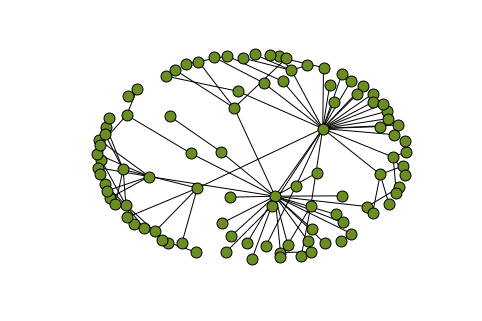

In [143]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range(2,100):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i,randNode])
    
nx.draw_spring(G, node_size = 120, with_labels = False, node_color = '#6b8e23', k=0.15)
plt.show()

* Now create a 5000 node network.



In [140]:
G = nx.Graph()
G.add_edge(0,1)
list = [0,1]
for i in range (2, 5000):
    randNode = np.random.choice(list)
    G.add_edge(i, randNode)
    list.extend([i,randNode])

* What's the maximum and minimum degree?


In [112]:
degree_sequence = [d for n,d in G.degree().iteritems()]
print "Max degree is " + str(max(degree_sequence))
print "Min degree is " + str(min(degree_sequence))

Max degree is 181
Min degree is 1


* Now, bin the degree distribution, for example using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.

In [138]:
val, bins = np.histogram(degree_sequence, bins=100)
bins = np.delete(bins, -1)

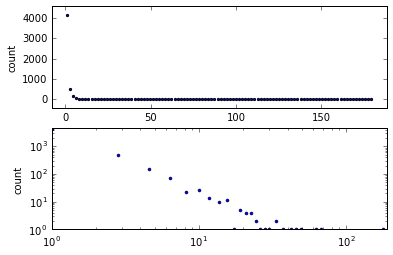

In [137]:
# Two subplots, the axes array is 1-d
plt.subplot(211)
plt.margins(0.05, 0.1) #inner margin 
plt.scatter(bins, val, s=5)
plt.ylabel('count')

plt.subplot(212)
plt.margins(0.05, 0.1) #inner margin 
plt.ylabel('count')
plt.loglog(bins, val,'bo', markersize = 3)


plt.show()

# Power-laws and the friendship paradox

* Pick a node i at random (e.g. use random.choice). Find its degree.

In [195]:
rand_node = rnd.choice(G.nodes())
degree_rand_node = G.degree(rand_node)
print "Degree of random node is " + str(degree_rand_node)

Degree of random node is 2


* Find i's neighbors. And calculate their average degree.


In [196]:
neighbours = G.neighbors(rand_node)

neighbours_degree = []
for item in neighbours:
    neighbours_degree.append(G.degree(item))
    
neighbours_average_degree = np.mean(neighbours_degree)

print "Average degree of neighbors is " + str(neighbours_average_degree)

Average degree of neighbors is 2.5


* Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.


In [197]:
if(degree_rand_node > neighbours_average_degree):
    print "I has more friends then its neighbours"
else:
    print "I has less friends then its neighbours"

I has less friends then its neighbours


* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [200]:
true_counter = 0;
nodes = G.nodes()
for i in range(0,1000):
    #random nodes degree
    rand_node = rnd.choice(nodes)
    degree_rand_node = G.degree(rand_node)
    
    #get neighbors and calculate their average degree 
    neighbours = G.neighbors(rand_node)
    
    neighbours_degree = []
    for item in neighbours:
        neighbours_degree.append(G.degree(item))

    neighbours_average_degree = np.mean(neighbours_degree)
    
    if(degree_rand_node < neighbours_average_degree):
        true_counter += 1

print "%d is friendship paradox true" % true_counter
print "In "+ str((true_counter/float(1000))*100) + "% the friendship paradox is true"

890 is friendship paradox true
In 89.0% the friendship paradox is true
